In [ ]:
#!pip install PyQt5

# The Stewart-Gough Platform

The most celebrated parallel robot, which is paradoxically referred to in the literature as the Stewart platform was first invented by V. E. Gough in 1947. The idea behind this invention, which is called a universal rig, was borrowed from the design of an octahedral hexapod that was used to determine the properties of tires under combined loads. The Gough platform there are six independently actuated limbs, where the lengths of the legs are controlled to move the platform to a desired position and orientation. The new idea of the Gough platform was the arrangement of the six struts. Although Gough was the first to invent and build the popular octahedral hexapod, Klaus Cappel later designed independently the very same hexapod, patented it, and licensed it to the first flight simulator companies. The name of Stewart was attached to this architecture because Gough’s earlier work and a photograph of this platform werementioned in reviewers’ remarks on a paper published by Stewart in 1965. In that paper, Stewart presents another hybrid design, with three legs having two actuators each. Stewart proposed this sixdegrees-of-freedom motion platform for use as a flight simulator. The proposed parallel mechanism, however, is different from the octahedral hexapod invented by Gough that is paradoxically often referred to as the Stewart platform. There is no doubt that Stewart’s remarkable paper had a great impact on the subsequent development in the field of parallel kinematics. Since this structure has six-degrees-of-freedom and is a fully parallel mechanism, many analyses of this structure were reported, which can be used as the basis for a similar parallel mechanism in practice (TAGHIRAD, Hamid D. Parallel robots: mechanics and control. CRC press, 2013).

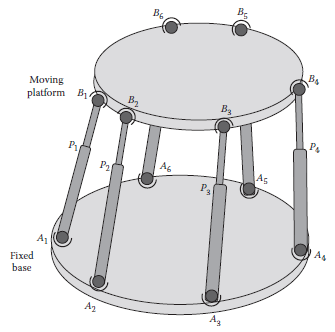

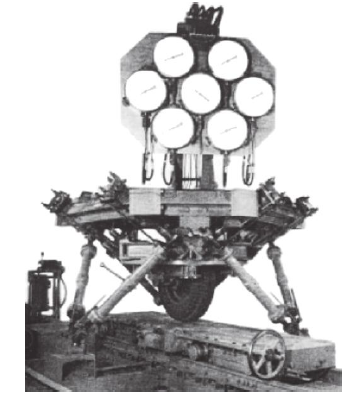

In [1]:
import numpy as np

# Ângulo inicial e cálculo dos ângulos para a base
gama_B = 15  # em graus
pis_B = [gama_B, 120 - gama_B, 120 + gama_B, -120 - gama_B, -120 + gama_B, -gama_B]  # em graus

# Convertendo graus para radianos
pis_B_rad = np.radians(pis_B)  # Convertendo de graus para radianos

# Definindo o raio da base
r_B = 0.6  # raio da base em metros

# Calculando as coordenadas x e y para os pontos Bi
Bx = r_B * np.cos(pis_B_rad)  # coordenadas x
By = r_B * np.sin(pis_B_rad)  # coordenadas y
Bz = np.full(len(Bx), 0.0)  # array de altura constante, se todos os pontos estão elevados em 0.0 m
# Criando o array Bi que inclui as coordenadas x, y e z (z é 0 pois está no plano XY)
B = np.array([Bx, By, Bz])  # Agrupando as coordenadas em um array 3D

# Transposição para que cada coluna represente um ponto Bi
B
print("Coordenadas dos pontos Bi na base:")
B

Coordenadas dos pontos Bi na base:


array([[ 0.5795555 , -0.15529143, -0.42426407, -0.42426407, -0.15529143,
         0.5795555 ],
       [ 0.15529143,  0.5795555 ,  0.42426407, -0.42426407, -0.5795555 ,
        -0.15529143],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [2]:
import numpy as np

# Ângulo inicial e cálculo dos ângulos para a plataforma
gama_P = 45  # em graus
pis_P = [gama_P, 120 - gama_P, 120 + gama_P, -120 - gama_P, -120 + gama_P, -gama_P]  # em graus

# Convertendo graus para radianos
pis_P_rad = np.radians(pis_P)  # Convertendo de graus para radianos

# Definindo o raio da plataforma
r_P = 0.25  # raio da plataforma em metros

# Calculando as coordenadas x e y para os pontos Pi
Px = r_P * np.cos(pis_P_rad)  # coordenadas x
Py = r_P * np.sin(pis_P_rad)  # coordenadas y

# Suponha que a altura z da plataforma seja fixa, por exemplo, z = 0.1 metros acima da base
Pz = np.full(len(Px), 0)  # array de altura constante, se todos os pontos estão elevados em 0.1 m

# Criando o array Pi que inclui as coordenadas x, y e z
P = np.array([Px, Py, Pz])  # Agrupando as coordenadas em um array 3D

# Transposição para que cada coluna represente um ponto Pi
P

print("Coordenadas dos pontos Pi na plataforma:")
P


Coordenadas dos pontos Pi na plataforma:


array([[ 0.1767767 ,  0.06470476, -0.24148146, -0.24148146,  0.06470476,
         0.1767767 ],
       [ 0.1767767 ,  0.24148146,  0.06470476, -0.06470476, -0.24148146,
        -0.1767767 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [190]:
import numpy as np
r_B, r_P, gamma_B, gamma_P = 0.6, 0.25, 15*np.pi/180, 45*np.pi/180
#0.2269rad is 13 degrees, which is standard gamma_B for Stewart Platforms

pi = np.pi

# Define the Geometry of the Platform
# Psi_B (Polar Coordinates)
psi_B = np.array([
    -gamma_B,
    gamma_B,
    2*pi/3 - gamma_B,
    2*pi/3 + gamma_B,
    2*pi/3 + 2*pi/3 - gamma_B,
    2*pi/3 + 2*pi/3 + gamma_B])

# Psi_P (Polar coordinates)
# Direction of the point where the rod is attached to the platform.
psi_P = np.array([
    pi/3 + 2*pi/3 + 2*pi/3 + gamma_P,
    pi/3 + -gamma_P,
    pi/3 + gamma_P,
    pi/3 + 2*pi/3 - gamma_P,
    pi/3 + 2*pi/3 + gamma_P,
    pi/3 + 2*pi/3 + 2*pi/3 - gamma_P])

# Coordinates of the points where the rods are attached to the platform.
B = r_B * np.array( [
    [ np.cos(psi_B[0]), np.sin(psi_B[0]), 0],
    [ np.cos(psi_B[1]), np.sin(psi_B[1]), 0],
    [ np.cos(psi_B[2]), np.sin(psi_B[2]), 0],
    [ np.cos(psi_B[3]), np.sin(psi_B[3]), 0],
    [ np.cos(psi_B[4]), np.sin(psi_B[4]), 0],
    [ np.cos(psi_B[5]), np.sin(psi_B[5]), 0] ])
B = np.transpose(B)

# Coordinates of the points where the rods are attached to the platform.
P = r_P * np.array([
    [ np.cos(psi_P[0]),  np.sin(psi_P[0]), 0],
    [ np.cos(psi_P[1]),  np.sin(psi_P[1]), 0],
    [ np.cos(psi_P[2]),  np.sin(psi_P[2]), 0],
    [ np.cos(psi_P[3]),  np.sin(psi_P[3]), 0],
    [ np.cos(psi_P[4]),  np.sin(psi_P[4]), 0],
    [ np.cos(psi_P[5]),  np.sin(psi_P[5]), 0] ])
P = np.transpose(P)

print('6x3 array for Base anchors \n', B)
#print('6x1 array for psi_B \n', psi_B)

print('6x3 array for Platform anchors \n', P)
#print('6x1 array for psi_P \n', psi_P)

6x3 array for Base anchors 
 [[ 0.5795555   0.5795555  -0.15529143 -0.42426407 -0.42426407 -0.15529143]
 [-0.15529143  0.15529143  0.5795555   0.42426407 -0.42426407 -0.5795555 ]
 [ 0.          0.          0.          0.          0.          0.        ]]
6x3 array for Platform anchors 
 [[ 0.24148146  0.24148146 -0.06470476 -0.1767767  -0.1767767  -0.06470476]
 [-0.06470476  0.06470476  0.24148146  0.1767767  -0.1767767  -0.24148146]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [3]:
gama_B = np.radians(gama_B)
gama_B

0.2617993877991494

**It's possible to plot this results with MatPLotLib.**

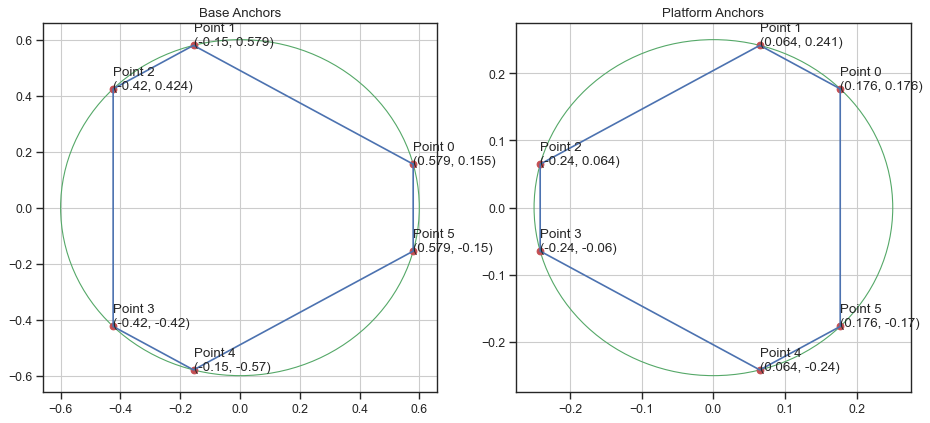

In [4]:
import matplotlib.pyplot as plt
import seaborn

def plot_2D_annotate(X, Y):
    X = list(X)
    Y = list(Y)
    ax.plot(X,Y, 'or')  # Plot Points
    # Annotate Points
    for i, (xy) in enumerate(zip(X, Y)):
        ax.annotate('Point ' + str(i) + '\n(%.5s, %.5s)' % xy, xy=xy, textcoords='data')

    X.append(X[0])
    Y.append(Y[0])
    ax.plot(X,Y)    # Plot lines

seaborn.set(style='ticks')
# plt.style.use('dark_background')

fig = plt.figure(figsize=(14, 6), dpi=80)

ax = fig.add_subplot(121)
ax.set_title('Base Anchors')
plot_2D_annotate(B[0,:], B[1,:])
circle_B = plt.Circle((0, 0), r_B, color='g', fill=False)
ax.add_patch(circle_B)
ax.grid(True)
ax = fig.add_subplot(122)
ax.set_title('Platform Anchors')
plot_2D_annotate(P[0,:], P[1,:])
circle_r = plt.Circle((0, 0), r_P, color='g', fill=False)
ax.add_patch(circle_r)
ax.grid(True)
plt.show()

### Defining Home Position
The next step is to define the displacement between the base and the platform at home position, *h*. This is the length of your linear actuators at rest. We'll assume it's radius of your base plate.

We also need to define the rotation matrices following the standard notation

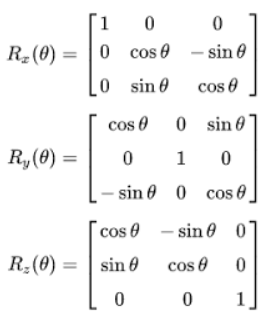

In [5]:
## Definition of the platform home position.
home_pos = np.array([0, 0, 1])

# Allocate for variables
l = np.zeros((3,6))
lll = np.zeros((6))

# ROtation matrices used later
def rotX(theta):
  rotx = np.array([
      [1, 0, 0 ],
      [0, np.cos(theta), -np.sin(theta)],
      [0, np.sin(theta), np.cos(theta)]])
  return rotx

def rotY(theta):
  roty= np.array([
      [np.cos(theta), 0, np.sin(theta) ],
      [0, 1, 0],
      [-np.sin(theta), 0, np.cos(theta)]])
  return roty

def rotZ(theta):
  rotz= np.array([
      [np.cos(theta), -np.sin(theta), 0 ],
      [np.sin(theta), np.cos(theta), 0],
      [0, 0, 1]])
  return rotz

### Solving for Inverse Kinematics using Linear Actuators


In [6]:
# Given input trans, rotation
trans = np.transpose(np.array([0,0,1.2])) # X, Y, Z
rotation = np.transpose(np.array([0,0,0])) # X, Y, Z

# Get rotation matrix of platform. RotZ* RotY * RotX -> matmul
# R = np.matmul( np.matmul(rotZ(rotation[2]), rotY(rotation[1])), rotX(rotation[0]) )
R = np.matmul( np.matmul(rotX(rotation[0]), rotY(rotation[1])), rotZ(rotation[2]) )

# Get leg length for each leg
# leg = np.repeat(trans[:, np.newaxis], 6, axis=1) + np.repeat(home_pos[:, np.newaxis], 6, axis=1) + np.matmul(np.transpose(R), P) - B
l = np.repeat(trans[:, np.newaxis], 6, axis=1) + np.repeat(home_pos[:, np.newaxis], 6, axis=1) + np.matmul(R, P) - B
lll = np.linalg.norm(l, axis=0)

# Position of leg in global frame
L = l + B

print('Leg lengths to command in order to achieve desired position of plate: \n', lll)

Leg lengths to command in order to achieve desired position of plate: 
 [2.23666993 2.23666993 2.23666993 2.23666993 2.23666993 2.23666993]


### Plotting for Visualization

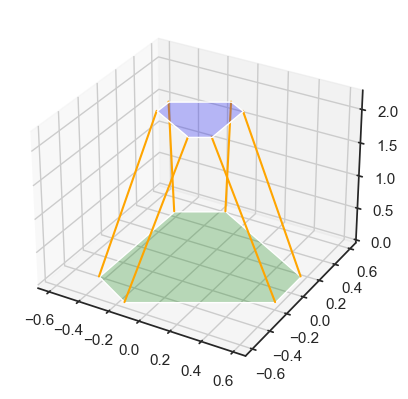

In [7]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot3D_line(ax, vec_arr_origin, vec_arr_dest, color_):
    for i in range(6):
        ax.plot([vec_arr_origin[0, i] , vec_arr_dest[0, i]],
        [vec_arr_origin[1, i], vec_arr_dest[1, i]],
        [vec_arr_origin[2, i],vec_arr_dest[2, i]],
        color=color_)

#interactive plotting in separate window
# Comment out this and restart kernel if you're having issues with interactive plot (qt)
# %matplotlib qt
%matplotlib inline

ax = plt.axes(projection='3d') # Data for a three-dimensional line
ax.set_xlim3d(-0.65, 0.65)
ax.set_ylim3d(-0.65, 0.65)
ax.set_zlim3d(0, lll[0])

# ax.add_collection3d(Poly3DCollection([list(np.transpose(s.B))]), zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(B))], facecolors='green', alpha=0.25))

# ax.add_collection3d(base_plot, zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(L))], facecolors='blue', alpha=0.25))

plot3D_line(ax, B, L, 'orange')
plt.show()

### Inverse Kinematics with Rotational Servos


In [9]:
lhl = r_B/2
ldl = 3
z = np.sqrt( ldl**2 + lhl**2 - (P[0] - B[0])**2 - (P[1] - B[1])**2)
home_pos= np.array([0, 0, z[0] ])
pi = np.pi
# Beta (Angle)
# Angle between the plane in which the servo arm moves and the xz-plane of the base CS.
'''beta = np.array([
    pi/2 + pi,
    pi/2,
    2*pi/3 + pi/2 + pi ,
    2*pi/3 + pi/2,
    4*pi/3 + pi/2 + pi ,
    4*pi/3 + pi/2] )'''


beta = np.array([
     pi -2*gama_B,
    -pi/4+gama_B,
    pi +pi/2 ,
    -pi -pi/2,
    pi/4-gama_B ,
    -pi +2*gama_B])


# Allocate arrays for variables
angles = np.zeros((6))
H = np.zeros((3,6))

In [11]:
gama_B, ldl

(0.2617993877991494, 3)

In [12]:
# Position of legs, wrt to their individual bases, split for clarity.
lx = l[0, :]
ly = l[1, :]
lz = l[2, :]

# Calculate auxiliary quatities g, f and e
g = lll**2 - ( ldl**2 - lhl**2 )

e = 2 * lhl * lz

# Calculate servo angles for each leg
for k in range(6):
    fk = 2 * lhl * (np.cos(beta[k]) * lx[k] + np.sin(beta[k]) * ly[k])

    # The wanted position could be achieved if the solution of this
    # equation is real for all i
    angles[k] = np.arcsin(g[k] / np.sqrt(e[k]**2 + fk**2)) - np.arctan2(fk,e[k])

    # Get postion of the point where a spherical joint connects servo arm and rod.
    H[:, k] = np.transpose([
        lhl * np.cos(angles[k]) * np.cos(beta[k]) + B[0,k],
        lhl * np.cos(angles[k]) * np.sin(beta[k]) + B[1,k],
        lhl * np.sin(angles[k]) ])

print('angles: ',angles*180/pi )


angles:  [nan nan nan nan nan nan]


C:\Users\User\AppData\Local\Temp\ipykernel_9556\3125104882.py:17: RuntimeWarning: invalid value encountered in arcsin
  angles[k] = np.arcsin(g[k] / np.sqrt(e[k]**2 + fk**2)) - np.arctan2(fk,e[k])


### Plotting

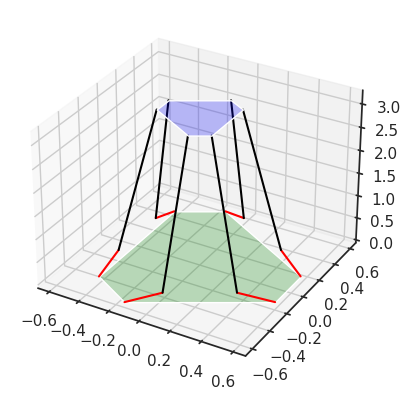

In [218]:
#interactive plotting in separate window

%matplotlib inline
#%matplotlib tk
#%matplotlib qt

ax = plt.axes(projection='3d') # Data for a three-dimensional line

ax.set_xlim3d(-0.65, 0.65)
ax.set_ylim3d(-0.65, 0.65)
ax.set_zlim3d(0, lll[0])

# ax.add_collection3d(Poly3DCollection([list(np.transpose(s.B))]), zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(B))], facecolors='green', alpha=0.25))

# ax.add_collection3d(base_plot, zs='z')
ax.add_collection3d(Poly3DCollection([list(np.transpose(L))], facecolors='blue', alpha=0.25))

plot3D_line(ax, B, H, 'red')
plot3D_line(ax, H, L, 'black')
#plot3D_line(ax, B, L, 'orange')

In [238]:
L= L.T

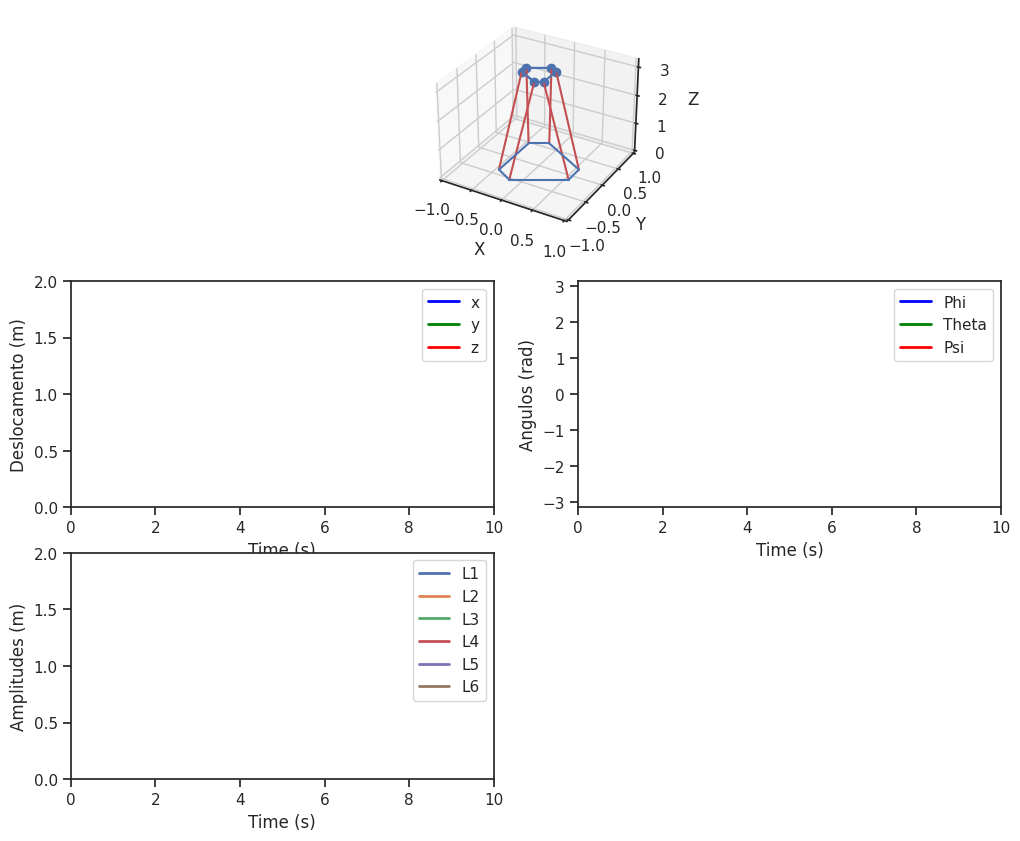

In [247]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Config para a animação
fig = plt.figure(figsize=(12, 10))

#Grafico 3D
ax3d = fig.add_subplot(311, projection='3d')

ax3d.set_xlim3d(-1, 1)
ax3d.set_ylim3d(-1, 1)
ax3d.set_zlim3d(0, lll[0])

ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')


#Grafico 2D - Deslocamento
ax2d = fig.add_subplot(323)

ax2d.set_xlim(0, 10)
ax2d.set_ylim(0, 2)

ax2d.set_xlabel('Time (s)')
ax2d.set_ylabel('Deslocamento (m)')

x_line, = ax2d.plot([], [], lw=2, label='x', color='blue')  # Linha x em azul
y_line, = ax2d.plot([], [], lw=2, label='y', color='green') # Linha y em verde
z_line, = ax2d.plot([], [], lw=2, label='z', color='red')   # Linha z em vermelho
ax2d.legend()






#Grafico 2D - Angulos
ax_angle = fig.add_subplot(324)

ax_angle.set_xlim(0, 10)
ax_angle.set_ylim(-pi, pi)

ax_angle.set_xlabel('Time (s)')
ax_angle.set_ylabel('Angulos (rad)')

phi_line, = ax_angle.plot([], [], lw=2, label='Phi', color='blue')  # Linha Phi em azul
theta_line, = ax_angle.plot([], [], lw=2, label='Theta', color='green') # Linha Theta em verde
psi_line, = ax_angle.plot([], [], lw=2, label='Psi', color='red')   # Linha Psi em vermelho
ax_angle.legend()




#Gráfico 2D - amplitudes dos Atuadores
ax_amp = fig.add_subplot(325)

ax_amp.set_xlim(0, 10)
ax_amp.set_ylim(0, 2)

ax_amp.set_xlabel('Time (s)')
ax_amp.set_ylabel('Amplitudes (m)')

amp_lines = [ax_amp.plot([], [], lw=2, label=f'L{i+1}')[0] for i in range(6)]
ax_amp.legend()




#dados para os gráficos 2D
times = np.linspace(0, 10, 500)
displacements = 1 + 0.3 * np.sin(3 * times)
#displacements = 1
phis = np.zeros_like(times)
thetas = np.zeros_like(times)
psis = np.zeros_like(times)




# Amplitudes dos atuadores
amplitudes = np.zeros((6, len(times)))



# Calculando amplitudes ao longo do tempo
for i, t in enumerate(times):
    z = 1 + 0.3 * np.sin(3 * t)
    #z = t +1
    for j in range(6):
        amplitudes[j, i] = lll[j]



# Função de atualização para a animação
def update(num, B,L, lines, z_line, phi_line, theta_line, psi_line, amp_lines):
    t = num / 50.0
    #z = 1 + 0.3 * np.sin(3 * t)
    z = t

    #S = P_vertices(x, y, z, R, a, ds)

    # Atualiza os pontos da plataforma
    lines['platform'].set_data(L[:, 0], L[:, 1])
    lines['platform'].set_3d_properties(L[:, 2])

    for i in range(6):
        lines['actuators'][i].set_data([B[0, i], L[i, 0]], [B[1, i], L[i, 1]])
        lines['actuators'][i].set_3d_properties([B[2, i], L[i, 2]])

    for i in range(6):
        lines['base'][i].set_data([B[0, i], B[0, (i+1) % 6]], [B[1, i], B[1, (i+1) % 6]])
        lines['base'][i].set_3d_properties([B[2, i], B[2, (i+1) % 6]])


    for i in range(6):
        lines['platform_edges'][i].set_data([L[i, 0], L[(i+1) % 6, 0]], [L[i, 1], L[(i+1) % 6, 1]])
        lines['platform_edges'][i].set_3d_properties([L[i, 2], L[(i+1) % 6, 2]])

    # Atualiza os gráficos 2D
    z_line.set_data(times[:num], displacements[:num])
    #x_line.set_data(times[:num], phis[:num])
    #y_line.set_data(times[:num], thetas[:num])

    phi_line.set_data(times[:num], phis[:num])
    theta_line.set_data(times[:num], thetas[:num])
    psi_line.set_data(times[:num], psis[:num])

    for i in range(6):
        amp_lines[i].set_data(times[:num], amplitudes[i, :num])

    return [lines['platform']] + lines['actuators'] + lines['base'] + lines['platform_edges'] + [z_line, phi_line, theta_line, psi_line] + amp_lines




# Configuração das linhas para o gráfico 3D
lines = {
    'platform': ax3d.plot([], [], [], 'o-')[0],
    'actuators': [ax3d.plot([], [], [], 'r-')[0] for _ in range(6)],
    'base': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)],
    'platform_edges': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)]
}

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=len(times), fargs=(B,L, lines, z_line, phi_line, theta_line, psi_line, amp_lines),
                              interval=20, blit=True)

plt.show()


In [240]:
#dados para os gráficos 2D
times = np.linspace(0, 10, 500)
displacements = 1 + 0.3 * np.sin(3 * times)
#displacements = 1
phis = np.zeros_like(times)
thetas = np.zeros_like(times)
psis = np.zeros_like(times)


In [241]:

# Amplitudes dos atuadores
amplitudes = np.zeros((6, len(times)))


In [242]:

# Calculando amplitudes ao longo do tempo
for i, t in enumerate(times):
    z = 1 + 0.3 * np.sin(3 * t)
    #z = t +1
    for j in range(6):
        amplitudes[j, i] = lll[j]

In [245]:

# Função de atualização para a animação
def update(num, B,L, lines, z_line, phi_line, theta_line, psi_line, amp_lines):
    t = num / 50.0
    #z = 1 + 0.3 * np.sin(3 * t)
    z = t

    #S = P_vertices(x, y, z, R, a, ds)

    # Atualiza os pontos da plataforma
    lines['platform'].set_data(L[:, 0], L[:, 1])
    lines['platform'].set_3d_properties(L[:, 2])

    for i in range(6):
        lines['actuators'][i].set_data([B[0, i], L[i, 0]], [B[1, i], L[i, 1]])
        lines['actuators'][i].set_3d_properties([B[2, i], L[i, 2]])

    for i in range(6):
        lines['base'][i].set_data([B[0, i], B[0, (i+1) % 6]], [B[1, i], B[1, (i+1) % 6]])
        lines['base'][i].set_3d_properties([B[2, i], B[2, (i+1) % 6]])


    for i in range(6):
        lines['platform_edges'][i].set_data([L[i, 0], L[(i+1) % 6, 0]], [L[i, 1], L[(i+1) % 6, 1]])
        lines['platform_edges'][i].set_3d_properties([L[i, 2], L[(i+1) % 6, 2]])

    # Atualiza os gráficos 2D
    z_line.set_data(times[:num], displacements[:num])
    #x_line.set_data(times[:num], phis[:num])
    #y_line.set_data(times[:num], thetas[:num])

    phi_line.set_data(times[:num], phis[:num])
    theta_line.set_data(times[:num], thetas[:num])
    psi_line.set_data(times[:num], psis[:num])

    for i in range(6):
        amp_lines[i].set_data(times[:num], amplitudes[i, :num])

    return [lines['platform']] + lines['actuators'] + lines['base'] + lines['platform_edges'] + [z_line, phi_line, theta_line, psi_line] + amp_lines



In [246]:
# Configuração das linhas para o gráfico 3D
lines = {
    'platform': ax3d.plot([], [], [], 'o-')[0],
    'actuators': [ax3d.plot([], [], [], 'r-')[0] for _ in range(6)],
    'base': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)],
    'platform_edges': [ax3d.plot([], [], [], 'b-')[0] for _ in range(6)]
}

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=len(times), fargs=(B,L, lines, z_line, phi_line, theta_line, psi_line, amp_lines),
                              interval=20, blit=True)

plt.show()

In [137]:
#from src.stewart_controller import Stewart_Platform
#import matplotlib.pyplot as plt
#import numpy as np

# To calculate angles, initiate object
# Stewart_Platform(r_B, r_P, lhl, ldl, Psi_B, Psi_P, ref_rotation)
#platform = Stewart_Platform(132/2, 100/2, 30, 130, 0.2269, 0.82, 5*np.pi/6)

# platform.calculate(np.array[tx, ty, tz],np.array[rx, ry, rz])
#servo_angles = platform.calculate( np.array([0,0,0]), np.array([0, 0, 0]) )
#print(servo_angles)

# To Plot
#%matplotlib qt
#%matplotlib inline
#fig, ax = plt.subplots()
#ax = platform.plot_platform()
#plt.draw()

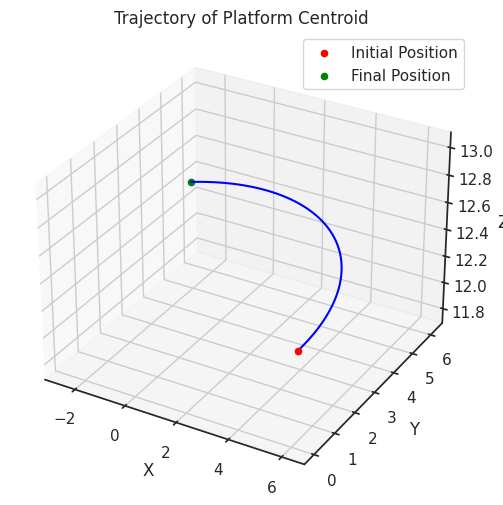

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros da plataforma de Stewart
r_B, r_P, gamma_B, gamma_P = 6.2, 5, 0.2269, 0.82
pi = np.pi

# Função para calcular as coordenadas do centróide da base móvel
def centroid_position(t):
    # Definir a trajetória da base móvel
    # Aqui, usamos uma trajetória simples de rotação ao redor do eixo z
    omega = 0.1  # Velocidade angular em rad/s
    x_B = r_B * np.cos(omega * t)
    y_B = r_B * np.sin(omega * t)
    z_B = 2 * r_B  # Altura constante da base móvel

    # Coordenadas do centróide da base móvel
    centroid_B = np.array([x_B, y_B, z_B])
    return centroid_B

# Tempo de simulação
t = np.linspace(0, 20, 100)  # Tempo de 0 a 20 segundos com 100 pontos

# Calcular as coordenadas do centróide da base móvel ao longo do tempo
centroid_positions = np.array([centroid_position(ti) for ti in t])

# Plotar a trajetória do centróide da base móvel
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], color='blue')
ax.scatter(centroid_positions[0, 0], centroid_positions[0, 1], centroid_positions[0, 2], color='red', label='Initial Position')
ax.scatter(centroid_positions[-1, 0], centroid_positions[-1, 1], centroid_positions[-1, 2], color='green', label='Final Position')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectory of Platform Centroid')
ax.legend()

plt.show()


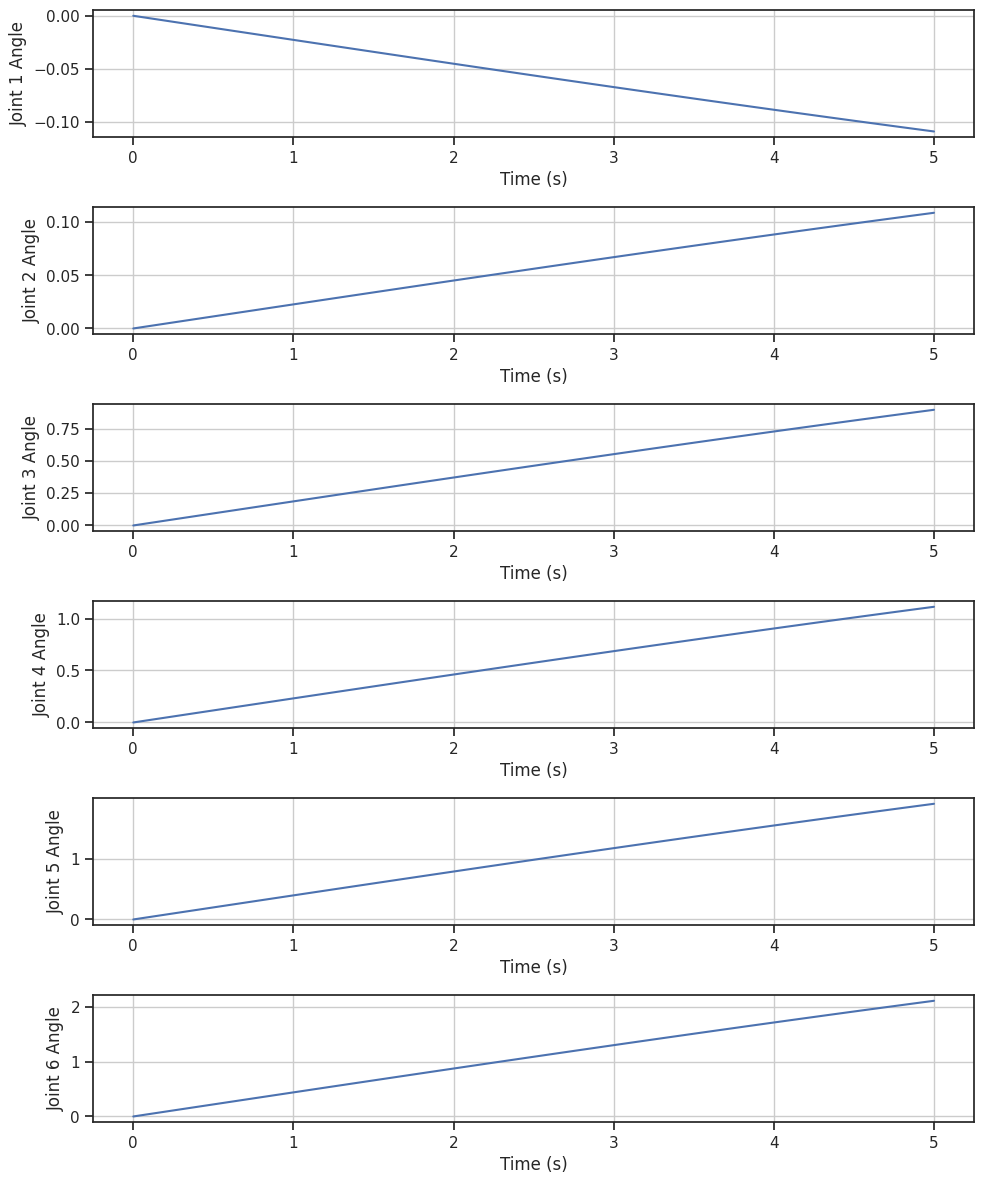

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros da plataforma de Stewart
gamma_B, gamma_P = 0.2269, 0.82  # Ângulos em radianos
pi = np.pi

# Função para calcular os ângulos das juntas rotativas em função do tempo
def joint_angles(t):
    # Definição das funções para os ângulos das juntas rotativas
    angle_functions = [
        lambda t: -gamma_B * np.sin(0.1 * t),  # Exemplo de função senoidal para o ângulo da junta 1
        lambda t: gamma_B * np.sin(0.1 * t),   # Exemplo de função senoidal para o ângulo da junta 2
        lambda t: (2*pi/3 - gamma_B) * np.sin(0.1 * t),  # Exemplo de função senoidal para o ângulo da junta 3
        lambda t: (2*pi/3 + gamma_B) * np.sin(0.1 * t),  # Exemplo de função senoidal para o ângulo da junta 4
        lambda t: (4*pi/3 - gamma_B) * np.sin(0.1 * t),  # Exemplo de função senoidal para o ângulo da junta 5
        lambda t: (4*pi/3 + gamma_B) * np.sin(0.1 * t)   # Exemplo de função senoidal para o ângulo da junta 6
    ]

    # Calcular os valores dos ângulos das juntas rotativas em função do tempo
    joint_angles_values = [angle_function(t) for angle_function in angle_functions]

    return joint_angles_values

# Tempo de simulação
t = np.linspace(0, 5, 100)  # Tempo de 0 a 20 segundos com 100 pontos

# Calcular os ângulos das juntas rotativas em função do tempo
joint_angles_over_time = [joint_angles(ti) for ti in t]

# Plotar os ângulos das juntas rotativas em função do tempo
fig, axs = plt.subplots(6, 1, figsize=(10, 12))

for i, ax in enumerate(axs, start=1):
    ax.plot(t, [angles[i-1] for angles in joint_angles_over_time])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'Joint {i} Angle')
    ax.grid(True)

plt.tight_layout()
plt.show()


(100, 3)


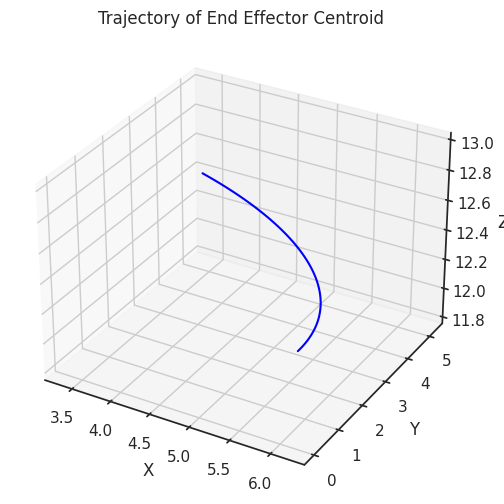

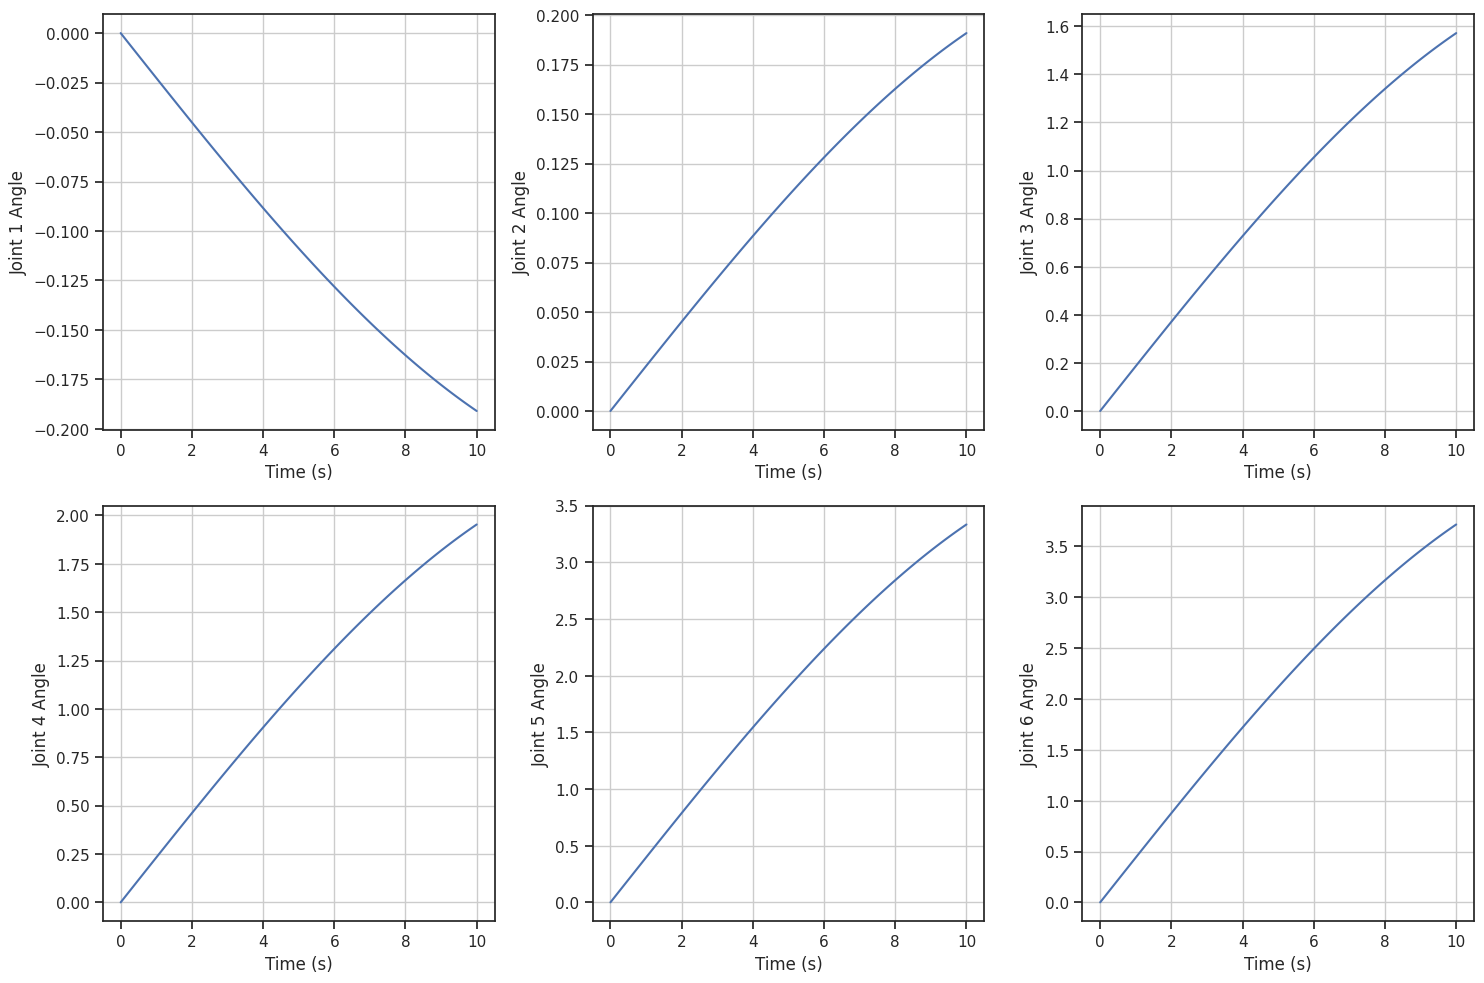

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_centroid_trajectory(centroid_positions):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectory of End Effector Centroid')
    plt.show()

def plot_joint_angles(t, joint_angles_over_time):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    for i in range(6):
        ax = axs[i // 3, i % 3]
        ax.plot(t, [angles[i] for angles in joint_angles_over_time])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Joint {i+1} Angle')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

# Parâmetros da plataforma de Stewart
r_B, r_P, gamma_B, gamma_P = 6.2, 5, 0.2269, 0.82
pi = np.pi

# Tempo de simulação
t = np.linspace(0, 10, 100)

# Função para calcular as coordenadas do centróide do efetuador
def centroid_position(t):
    omega = 0.1
    x_B = r_B * np.cos(omega * t)
    y_B = r_B * np.sin(omega * t)
    z_B = 2 * r_B
    return np.array([x_B, y_B, z_B]).T


print(centroid_positions.shape)

# Função para calcular os ângulos das juntas rotativas em função do tempo
def joint_angles(t):
    angle_functions = [
        lambda t: -gamma_B * np.sin(0.1 * t),
        lambda t: gamma_B * np.sin(0.1 * t),
        lambda t: (2*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (2*pi/3 + gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 + gamma_B) * np.sin(0.1 * t)
    ]
    return np.array([[angle_function(ti) for angle_function in angle_functions] for ti in t])

# Calcular as coordenadas do centróide do efetuador ao longo do tempo
centroid_positions = np.array([centroid_position(ti) for ti in t])

# Calcular os ângulos das juntas rotativas em função do tempo
joint_angles_over_time = joint_angles(t)

# Plotar a trajetória do centróide do efetuador
plot_centroid_trajectory(centroid_positions)

# Plotar os ângulos das juntas rotativas em função do tempo
plot_joint_angles(t, joint_angles_over_time)


(100, 3)


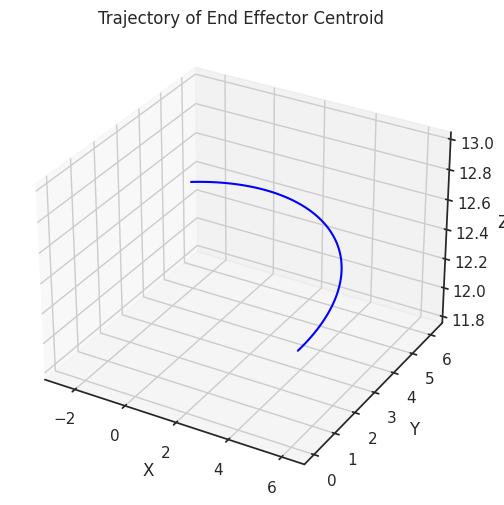

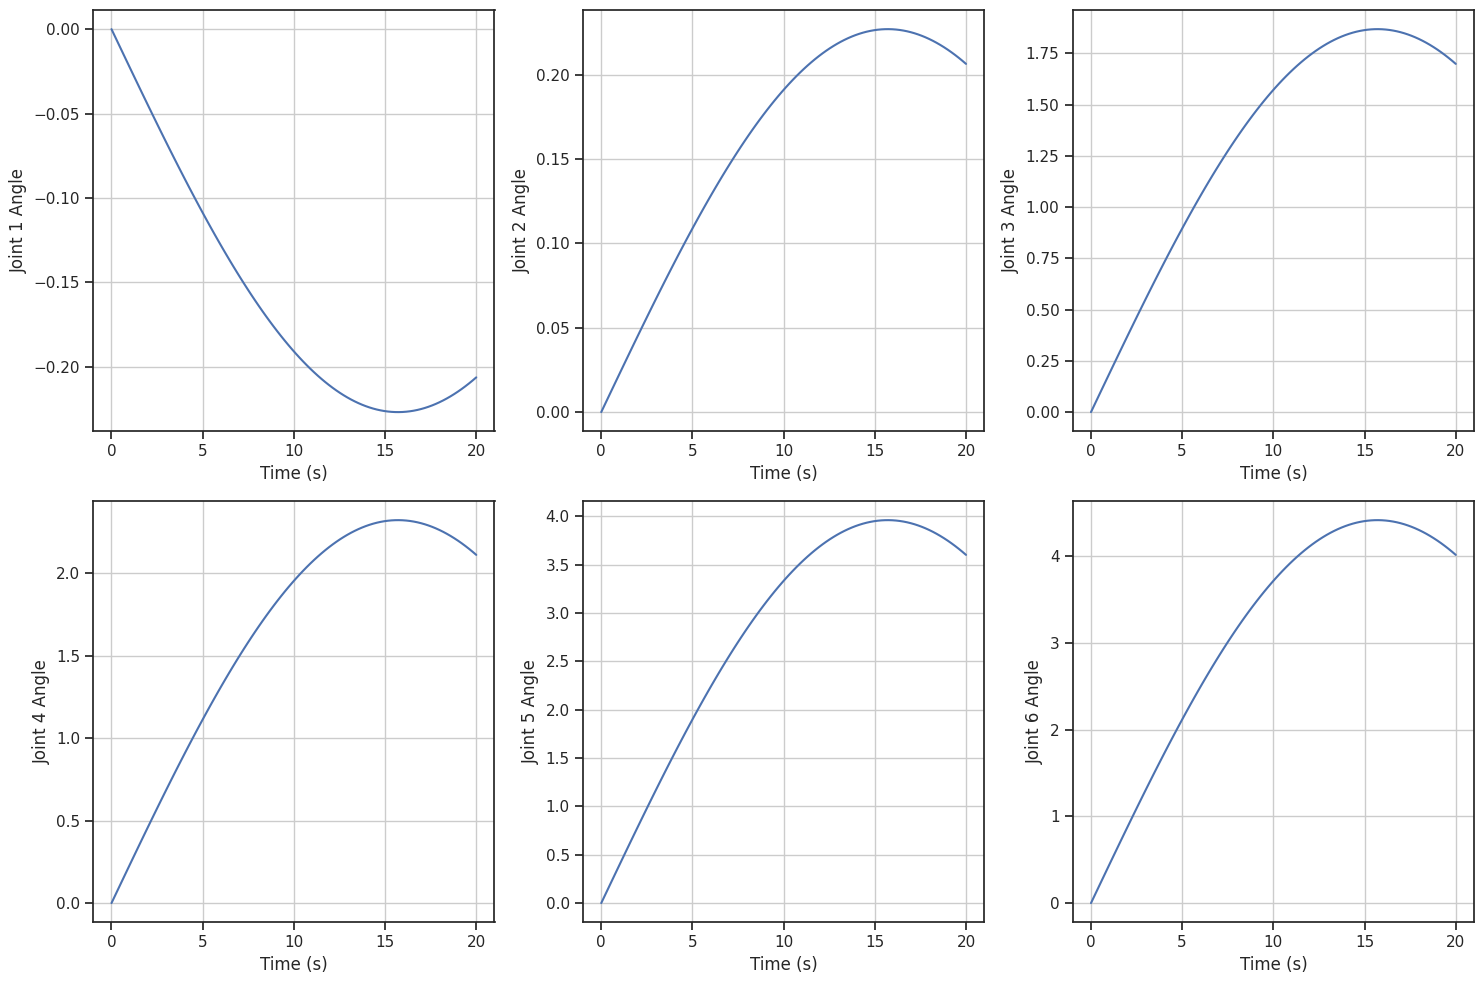

In [ ]:
def circular_trajectory(t):
    # Raio do círculo
    radius = 5.0

    # Frequência angular (velocidade de rotação)
    omega = 0.1

    # Coordenadas x e y do centróide em função do tempo
    x = radius * np.cos(omega * t)
    y = radius * np.sin(omega * t)

    # Altura constante do centróide
    z = 2 * radius

    # Retorna as coordenadas do centróide como um array
    return np.array([x, y, z]).T

    centroid_positions = circular_trajectory(t)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_centroid_trajectory(centroid_positions):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectory of End Effector Centroid')
    plt.show()

def plot_joint_angles(t, joint_angles_over_time):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    for i in range(6):
        ax = axs[i // 3, i % 3]
        ax.plot(t, [angles[i] for angles in joint_angles_over_time])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Joint {i+1} Angle')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

# Parâmetros da plataforma de Stewart
r_B, r_P, gamma_B, gamma_P = 6.2, 5, 0.2269, 0.82
pi = np.pi

# Tempo de simulação
t = np.linspace(0, 20, 100)

# Função para calcular as coordenadas do centróide do efetuador
def centroid_position(t):
    omega = 0.1
    x_B = r_B * np.cos(omega * t)
    y_B = r_B * np.sin(omega * t)
    z_B = 2 * r_B
    return np.array([x_B, y_B, z_B]).T


print(centroid_positions.shape)

# Função para calcular os ângulos das juntas rotativas em função do tempo
def joint_angles(t):
    angle_functions = [
        lambda t: -gamma_B * np.sin(0.1 * t),
        lambda t: gamma_B * np.sin(0.1 * t),
        lambda t: (2*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (2*pi/3 + gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 + gamma_B) * np.sin(0.1 * t)
    ]
    return np.array([[angle_function(ti) for angle_function in angle_functions] for ti in t])

# Calcular as coordenadas do centróide do efetuador ao longo do tempo
centroid_positions = np.array([centroid_position(ti) for ti in t])

# Calcular os ângulos das juntas rotativas em função do tempo
joint_angles_over_time = joint_angles(t)

# Plotar a trajetória do centróide do efetuador
plot_centroid_trajectory(centroid_positions)

# Plotar os ângulos das juntas rotativas em função do tempo
plot_joint_angles(t, joint_angles_over_time)


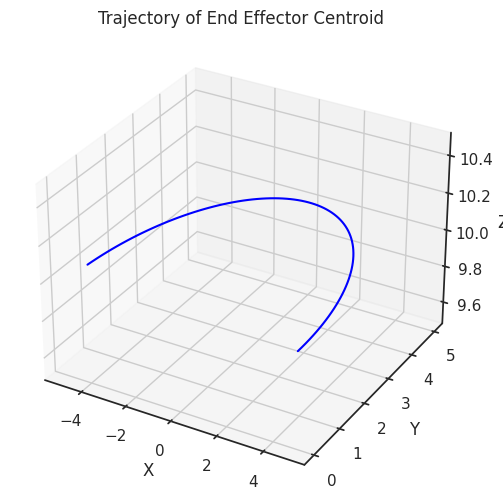

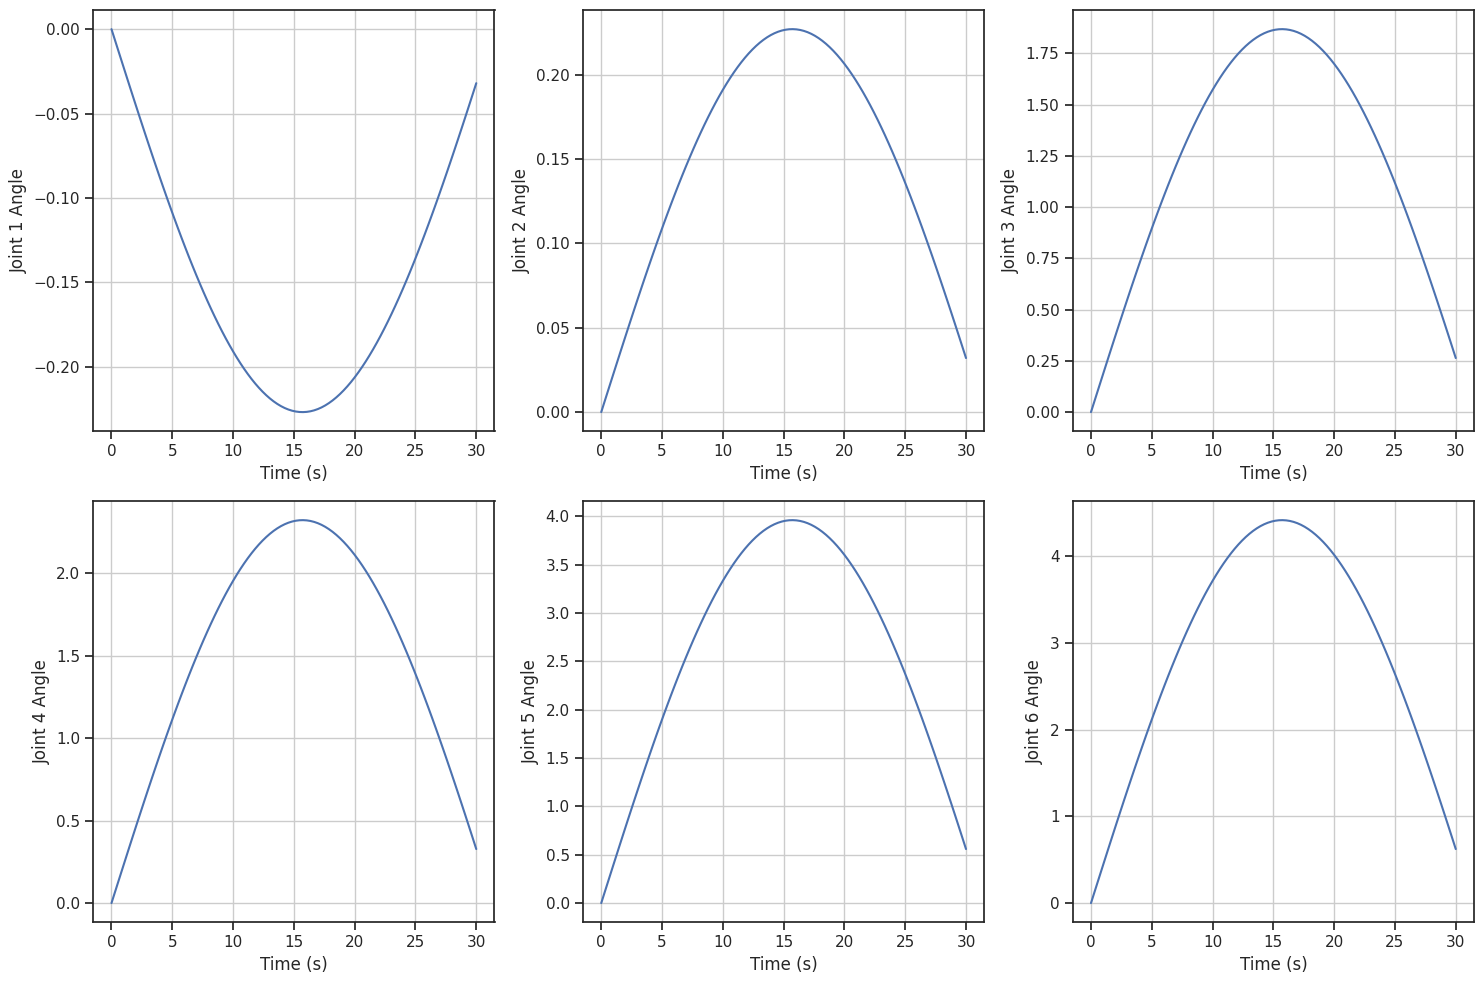

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def circular_trajectory(t):
    # Raio do círculo
    radius = 5.0

    # Frequência angular (velocidade de rotação)
    omega = 0.1

    # Coordenadas x e y do centróide em função do tempo
    x = radius * np.cos(omega * t)
    y = radius * np.sin(omega * t)

    # Altura constante do centróide
    z = np.full_like(x, 2 * radius)  # Replicar o valor de z para corresponder ao tamanho de x e y

    # Retorna as coordenadas do centróide como um array
    return np.column_stack((x, y, z))


def square_trajectory(t):
    # Lado do quadrado
    side_length = 10.0

    # Coordenadas x e y do centróide em função do tempo
    x = side_length * np.sin(0.1 * t)
    y = side_length * np.cos(0.1 * t)

    # Altura constante do centróide
    z = 2 * side_length

    # Retorna as coordenadas do centróide como um array
    return np.array([x, y, z]).T

def plot_centroid_trajectory(centroid_positions):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectory of End Effector Centroid')
    plt.show()

def plot_joint_angles(t, joint_angles_over_time):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    for i in range(6):
        ax = axs[i // 3, i % 3]
        ax.plot(t, [angles[i] for angles in joint_angles_over_time])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel(f'Joint {i+1} Angle')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

# Parâmetros da plataforma de Stewart
r_B, r_P, gamma_B, gamma_P = 6.2, 5, 0.2269, 0.82
pi = np.pi

# Tempo de simulação
t = np.linspace(0, 30, 100)

# Função para calcular as coordenadas do centróide do efetuador
def centroid_position(t):
    omega = 0.1
    x_B = r_B * np.cos(omega * t)
    y_B = r_B * np.sin(omega * t)
    z_B = 2 * r_B
    return np.array([x_B, y_B, z_B]).T

# Função para calcular os ângulos das juntas rotativas em função do tempo
def joint_angles(t):
    angle_functions = [
        lambda t: -gamma_B * np.sin(0.1 * t),
        lambda t: gamma_B * np.sin(0.1 * t),
        lambda t: (2*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (2*pi/3 + gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 - gamma_B) * np.sin(0.1 * t),
        lambda t: (4*pi/3 + gamma_B) * np.sin(0.1 * t)
    ]
    return np.array([[angle_function(ti) for angle_function in angle_functions] for ti in t])

# Calcular as coordenadas do centróide do efetuador ao longo do tempo
centroid_positions = circular_trajectory(t)

# Calcular os ângulos das juntas rotativas em função do tempo
joint_angles_over_time = joint_angles(t)

# Plotar a trajetória do centróide do efetuador
plot_centroid_trajectory(centroid_positions)

# Plotar os ângulos das juntas rotativas em função do tempo
plot_joint_angles(t, joint_angles_over_time)


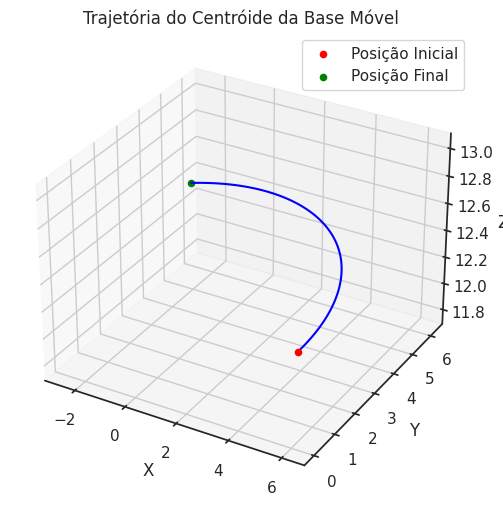

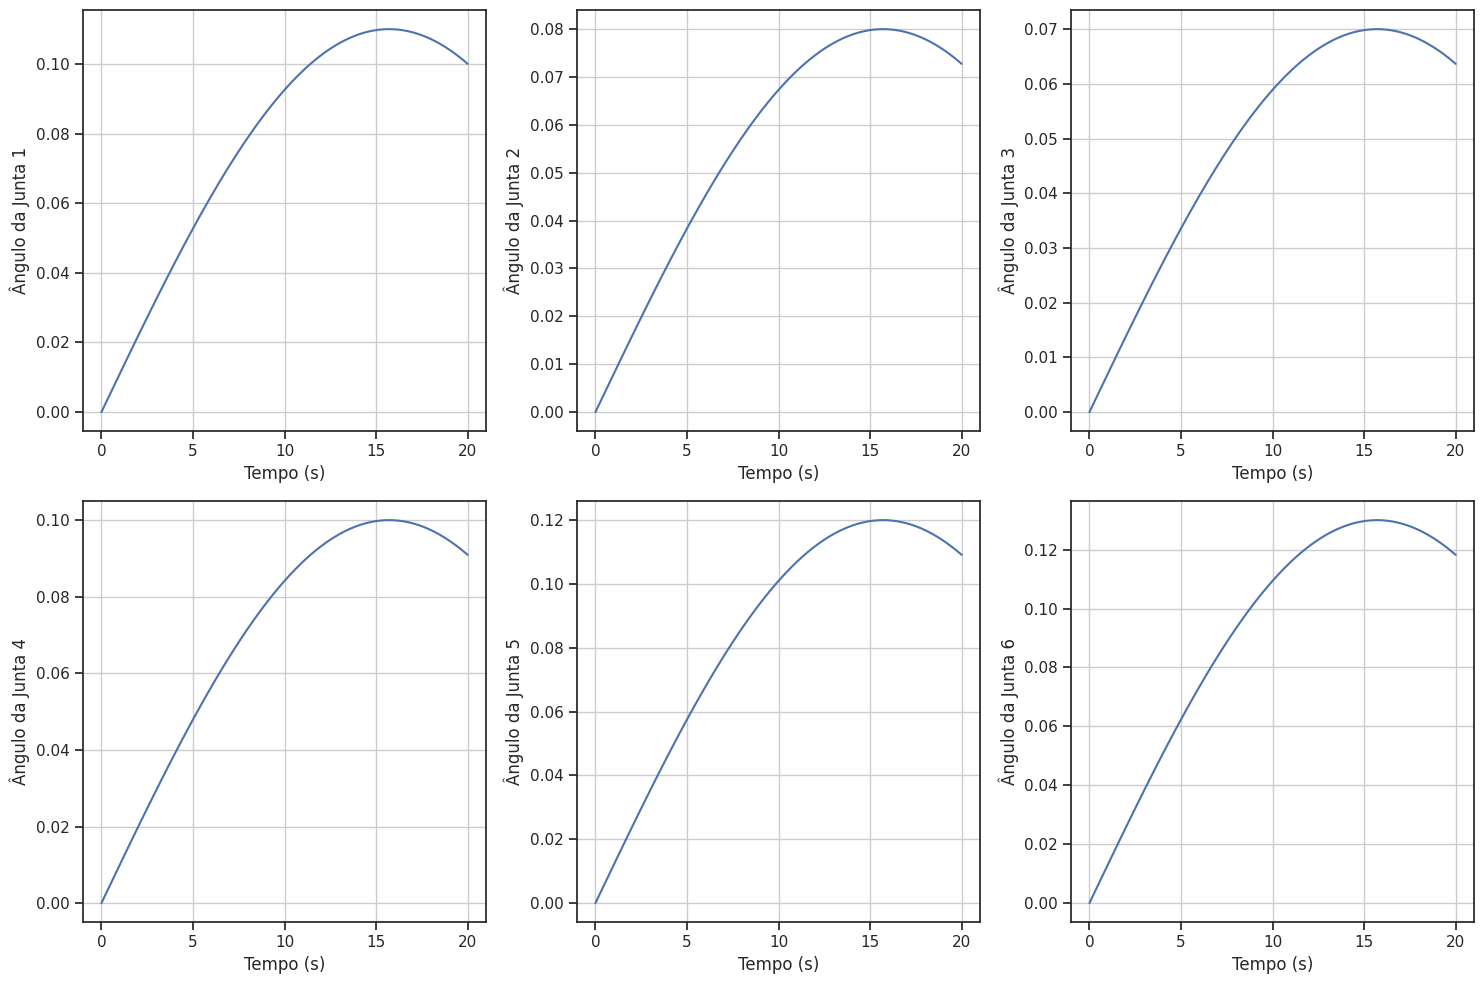

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros da plataforma de Stewart
r_B, r_P, gamma_B, gamma_P = 6.2, 5, 0.2269, 0.82
pi = np.pi

# Função para calcular as coordenadas do centróide da base móvel
def centroid_position(t):
    # Definir a trajetória da base móvel
    # Aqui, usamos uma trajetória simples de rotação ao redor do eixo z
    omega = 0.1  # Velocidade angular em rad/s
    x_B = r_B * np.cos(omega * t)
    y_B = r_B * np.sin(omega * t)
    z_B = 2 * r_B  # Altura constante da base móvel

    # Coordenadas do centróide da base móvel
    centroid_B = np.array([x_B, y_B, z_B])
    return centroid_B

# Tempo de simulação
t = np.linspace(0, 20, 100)  # Tempo de 0 a 20 segundos com 100 pontos

# Calcular as coordenadas do centróide da base móvel ao longo do tempo
centroid_positions = np.array([centroid_position(ti) for ti in t])

# Plotar a trajetória do centróide da base móvel
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(centroid_positions[:, 0], centroid_positions[:, 1], centroid_positions[:, 2], color='blue')
ax.scatter(centroid_positions[0, 0], centroid_positions[0, 1], centroid_positions[0, 2], color='red', label='Posição Inicial')
ax.scatter(centroid_positions[-1, 0], centroid_positions[-1, 1], centroid_positions[-1, 2], color='green', label='Posição Final')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajetória do Centróide da Base Móvel')
ax.legend()

plt.show()


# Função para calcular os ângulos das juntas rotativas em função do tempo
def joint_angles(t):
    # Valores de movimento para cada junta rotativa conforme a tabela
    serge_values = 0.11 * np.sin(0.1 * t)
    sway_values = 0.08 * np.sin(0.1 * t)
    heave_values = 0.07 * np.sin(0.1 * t)
    roll_values = 0.1 * np.sin(0.1 * t)
    pitch_values = 0.12 * np.sin(0.1 * t)
    yaw_values = 0.13 * np.sin(0.1 * t)

    return np.array([serge_values, sway_values, heave_values, roll_values, pitch_values, yaw_values])

# Calcular os ângulos das juntas rotativas em função do tempo
joint_angles_over_time = joint_angles(t)

# Plotar os ângulos das juntas rotativas em função do tempo
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten(), start=1):
    ax.plot(t, joint_angles_over_time[i-1])
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel(f'Ângulo da Junta {i}')
    ax.grid(True)

plt.tight_layout()
plt.show()
